In [1]:
import sys, os
sys.path.append('..'); os.chdir('..')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("data/emodataset/evaluations.csv", index_col="params")
metrics = ['ccc_v','ccc_a','ccc_mean','rmse_v','rmse_a','mae_v','mae_a','expr_acc']
df = df[metrics].T
df = df.drop(['mae_a', 'mae_v', 'ccc_mean'], axis=0)
# df["params"]
df

params,emonet_8_untrained.pth,emonet_8.pth,emonet_8_FT_15ep_best.pth
ccc_v,0.0004,0.524,0.6694
ccc_a,0.0017,0.162,0.1768
rmse_v,0.6820,0.539,0.5279
rmse_a,0.4930,0.415,0.3837
expr_acc,0.0599,0.584,0.5839


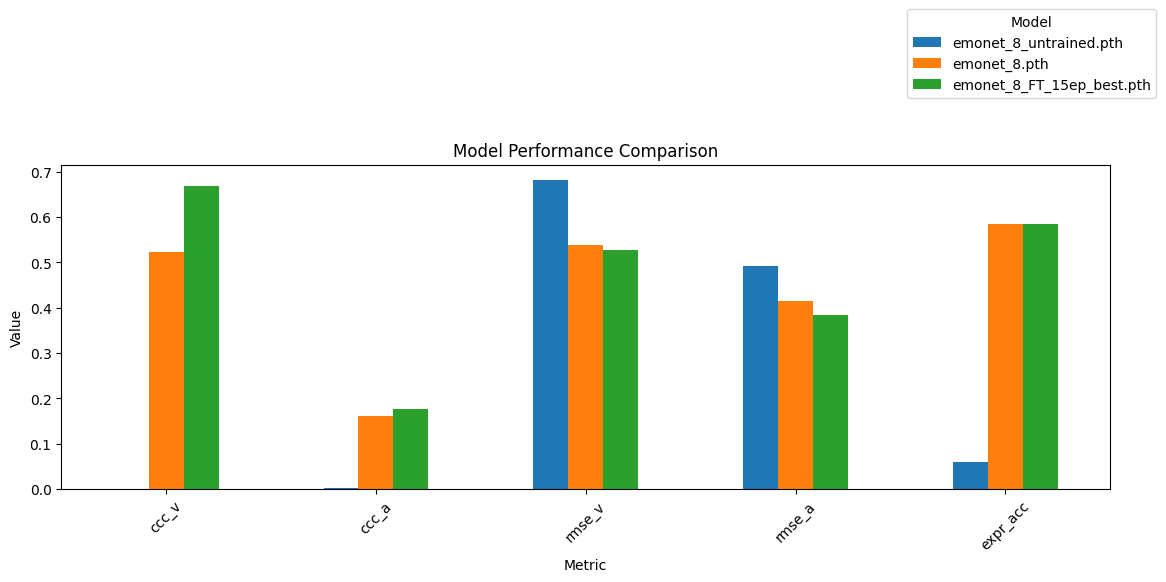

In [50]:
# plot dataframe

df.plot(kind='bar', figsize=(12, 7))
plt.title('Model Performance Comparison')
plt.ylabel('Value')
plt.xlabel('Metric')
plt.xticks(rotation=45)
plt.legend(title='Model', bbox_to_anchor=(.8, 1.5), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# plot subplots
df = pd.read_csv("data/emodataset/evaluations.csv")
# df = df.drop(["mae_v", "mae_a", "ccc_mean"], axis=1)
df

,params,ccc_v,ccc_a,rmse_v,rmse_a,expr_acc,description
0,emonet_8_untrained.pth,0.0004,0.0017,0.6820,0.4930,0.0599,Untrained
1,emonet_8.pth,0.5240,0.1620,0.5390,0.4150,0.5840,Pretrained (8 classes)
2,emonet_8_FT_15ep_best.pth,0.6694,0.1768,0.5279,0.3837,0.5839,Finetuned (15 epochs)


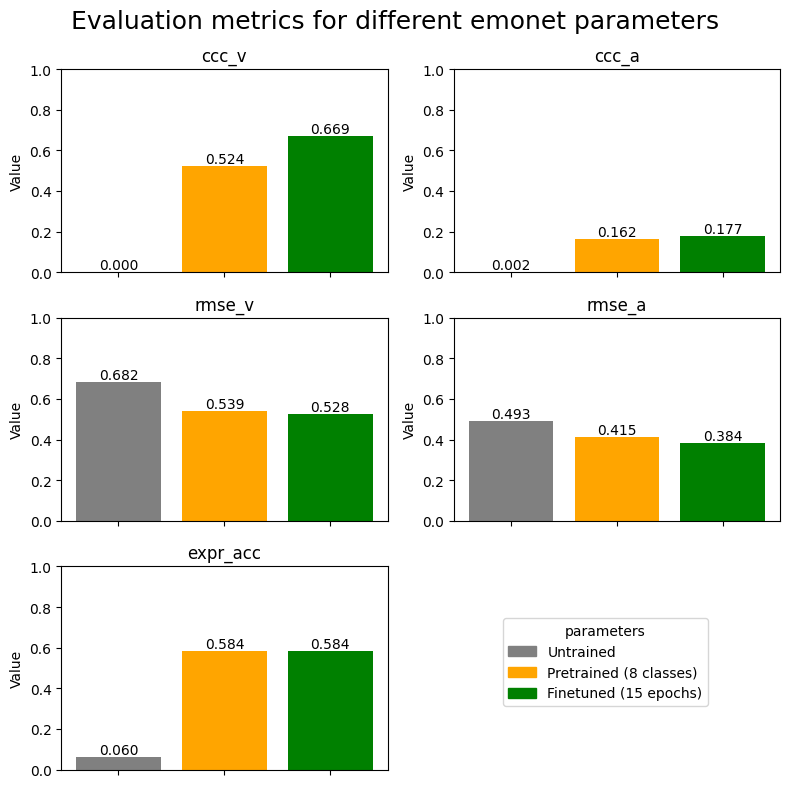

In [111]:
import matplotlib.patches as mpatches

metrics = ['ccc_v','ccc_a','rmse_v','rmse_a','expr_acc']

models = df['params'].tolist()
descriptions = df['description'].tolist()
x = np.arange(len(models))

colors = ["grey", "orange", "green"]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))
axes = axes.flatten()

for ax, metric in zip(axes, metrics):
    values = df[metric].tolist()
    bars = ax.bar(x, values, color=colors)
    ax.set_title(metric)
    ax.set_xticks(x)
    ax.set_ylim(0, 1)
    # ax.set_xticklabels(models, rotation=45, ha='right')
    ax.set_xticklabels([])  # remove x-axis labels
    ax.set_ylabel('Value')

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height,
                f'{height:.3f}', ha='center', va='bottom')

plt.suptitle('Evaluation metrics for different emonet parameters', fontsize=18)
axes[-1].axis('off')

handles = [ mpatches.Patch(color=color, label=desc) for color, desc in zip(colors, descriptions) ]
fig.legend(handles=handles, loc='lower right', bbox_to_anchor=(0.9, 0.1), title='parameters')
plt.tight_layout()
plt.show()